In [1]:
from scipy import io as sio
import numpy as np
import qiskit
from qiskit import visualization

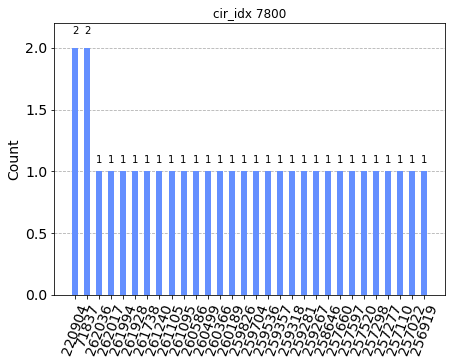

In [46]:
# all_results_load = sio.loadmat("measure_results_20230414_4000_8980.mat")
all_results_load = sio.loadmat("measure_results_20230417_0000_8980_abandon.mat")

cir_idx = 7800
state_count = dict([(s, cnt) for s, cnt in zip(
                    np.squeeze(all_results_load[f'circuit No.{cir_idx} state_index']), 
                    np.squeeze(all_results_load[f'circuit No.{cir_idx} measure_counts']))])
visualization.plot_histogram(state_count, number_to_keep=30, sort='value_desc', title=f'cir_idx {cir_idx}')

In [10]:
all_results_load = sio.loadmat("measure_results_20230418_per_day_circuit.mat")
cir_idx = 5
average_ground_p = {}
for day_i in np.arange(0, 5):
    probs = []
    for cir_idx in range(360):
        state_count = dict([(s, cnt) for s, cnt in zip(
                            np.squeeze(all_results_load[f'circuit No.{day_i}.{cir_idx} state_index']), 
                            np.squeeze(all_results_load[f'circuit No.{day_i}.{cir_idx} measure_counts']))])
        probs.append(state_count.get(0, 0) / 1000)
    average_ground_p.update({day_i: np.average(probs)})
# visualization.plot_histogram(state_count, number_to_keep=20, sort='value_desc', title=f'cir_idx {cir_idx}')
average_ground_p